85540
10845 10845
10593


"\nsc=ax.scatter(x[subO<200],y[subO<200],s=r[subO<200]**2*np.pi,c=z[subO<200],alpha=0.5)\nax.scatter(xs[subO<200],ys[subO<200],s=rs[subO<200]**2*np.pi,c='k',alpha=0.5)\nprint(len(BCGid[BCGid!=mainid]))\nplt.colorbar(sc)\n#ax.set_yscale('log')\n"

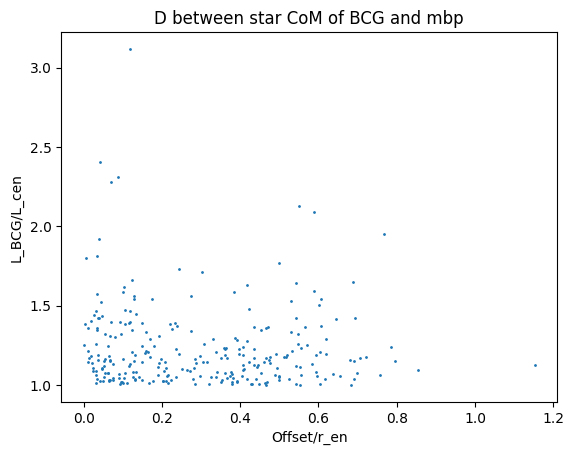

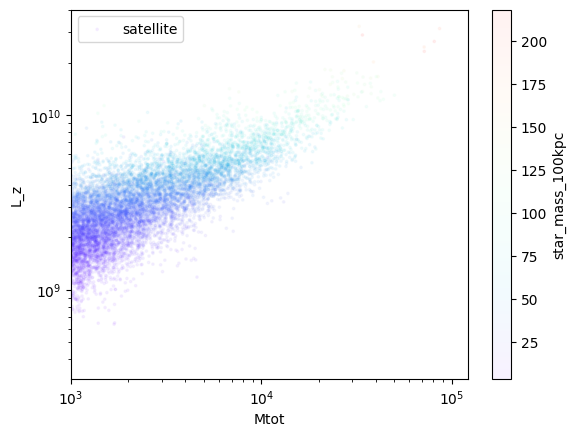

In [6]:
import h5py
import numpy as np
import unyt
import swiftsimio as sw
from swiftsimio import load
import swiftgalaxy as sg
import functions as fn
from matplotlib import colors
import matplotlib.pyplot as plt

path="/home/jyang/data/Flamingo/L1000N1800/"


f=h5py.File(path+'BCG_exr100kpc.hdf5','r')

mainid=np.array(f['PartType0']['mainid'])
BCGid=np.array(f['PartType0']['BCGid'])
O=np.array(f['PartType0']['BCGoffset'])
Rbri=np.array(f['PartType0']['Rbri'])
f.close()
fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(O[mainid!=BCGid],Rbri[mainid!=BCGid],s=1)
#ax.set_yscale('log')
ax.set_xlabel('Offset/r_en')
ax.set_ylabel('L_BCG/L_cen')
ax.set_title("D between star CoM of BCG and mbp")
#print(Rbri[Rbri>1])

f=h5py.File(path+'halos.hdf5','r')

halo_id=np.array(f["halos"]["id"])

radius=np.array(f["halos"]["radius"])
host_id=np.array(f["halos"]["hostid"])
mass=np.array(f["halos"]["mass"])
mbp=np.array(f["halos"]["center"])
star_mass=np.array(f["halos"]["mass_star_100kpc"])
com_star=np.array(f["halos"]["com_star_100kpc"])
star_lumz=np.array(f["halos"]["lumz_100kpc"])
f.close()
print(len(star_lumz))
#ignore all the halos without models of star lum and com
rs=np.sqrt(com_star[:,0]**2+com_star[:,1]**2+com_star[:,2]**2)
mask=(star_lumz>0)*(rs>0)
halo_id=halo_id[mask]
host_id=host_id[mask]
mbp=mbp[mask]

star_mass=star_mass[mask]
com_star=com_star[mask]
star_lumz=star_lumz[mask]
mass=mass[mask]
radius=radius[mask]
ids=np.arange(0,len(halo_id),1)

subid=BCGid[BCGid!=mainid]
submain=mainid[BCGid!=mainid]
print(len(mass[host_id==-1]),len(O))
submainid=halo_id[np.isin(ids,submain)]
submass=mass[np.isin(ids,subid)]
fig=plt.figure()
ax=plt.subplot(1,1,1)

sc=ax.scatter(mass[host_id!=-1],star_lumz[host_id!=-1],c=star_mass[host_id!=-1],s=3,alpha=0.05,label="satellite",cmap='rainbow')
b=plt.colorbar(sc)
b.set_label('star_mass_100kpc')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mtot')
ax.set_ylabel('L_z')
ax.set_xbound(10**3)

print(len(O[(Rbri<1.2)*(O<0.05)]))




subr=radius[np.isin(ids,subid)]
x=com_star[:,0][np.isin(ids,submain)]
y=com_star[:,1][np.isin(ids,submain)]
z=com_star[:,2][np.isin(ids,submain)]
r=radius[np.isin(ids,submain)]
subO=O[BCGid!=mainid]*r*1000
xs=com_star[:,0][np.isin(ids,subid)]
ys=com_star[:,1][np.isin(ids,subid)]
zs=com_star[:,2][np.isin(ids,subid)]
rs=radius[np.isin(ids,subid)]

#mask2=True#(subO*subr*1000<200)
#mass[mask]/mass[mask3]

'''
sc=ax.scatter(x[subO<200],y[subO<200],s=r[subO<200]**2*np.pi,c=z[subO<200],alpha=0.5)
ax.scatter(xs[subO<200],ys[subO<200],s=rs[subO<200]**2*np.pi,c='k',alpha=0.5)
print(len(BCGid[BCGid!=mainid]))
plt.colorbar(sc)
#ax.set_yscale('log')
'''

In [78]:
path="/home/jyang/data/Flamingo/L1000N0900/"
f=h5py.File(path+'halos.hdf5','r')
id=np.array(f["halos"]["id"])
radius=np.array(f["halos"]["radius"])
hostid=np.array(f["halos"]["hostid"])
mass=np.array(f["halos"]["mass"])
mbp=np.array(f["halos"]["center"])
CoM=np.array(f["halos"]["com_star_100kpc"])
f.close()
print(mbp[id==709452])
print(CoM[hostid==709452])
ids=np.arange(0,len(radius),1)
mbcg=mass[np.isin(id,BCGid[(mainid!=BCGid)*(O<0.01)])]
m=mass[(np.isin(id,mainid[(mainid!=BCGid)*(O<0.01)]))*(id!=2244356)]


[[309.26983412 969.52296412 715.47606412]]
[[309.26983655 969.54084655 715.46563655]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]


In [2]:
dir="../../../mnt/su3-pro/colibre/L0200N1504/THERMAL_AGN/SOAP/halo_properties_0127.hdf5"

data_h=sw.load(dir)
center=np.array(data_h.input_halos.halo_centre)
radius=np.array(data_h.bound_subhalo.enclose_radius)
data_h=[]

In [38]:
id=12975221
  
dir="../../../mnt/su3-pro/colibre/L0200N1504/THERMAL_AGN/SOAP"
r=radius[id]*unyt.Mpc
print(r)
sgi=sg.SWIFTGalaxy(dir+"/colibre_with_SOAP_membership_0127.hdf5",
                   sg.SOAP(dir+"/halo_properties_0127.hdf5",soap_index=id))

  


#  print(len(sgi.stars.spherical_coordinates.r))
xs=np.array(sgi.stars.cartesian_coordinates.x)
ys=np.array(sgi.stars.cartesian_coordinates.y)
zs=np.array(sgi.stars.cartesian_coordinates.z)
xdm=np.array(sgi.dark_matter.cartesian_coordinates.x)
ydm=np.array(sgi.dark_matter.cartesian_coordinates.y)
zdm=np.array(sgi.dark_matter.cartesian_coordinates.z)
#  PartType2=np.array([xdm,ydm,zdm]).T


6.0 Mpc


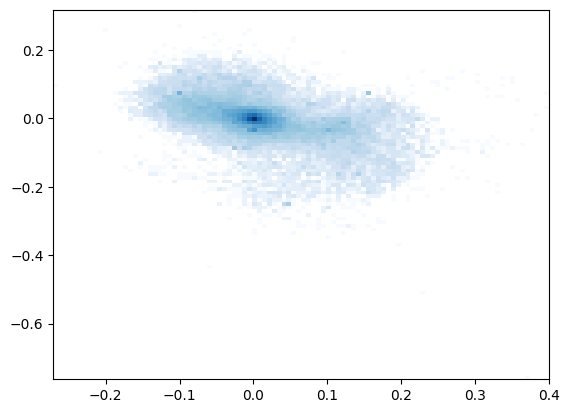

In [40]:
lum=sgi.stars.luminosities.GAMA_z
r=radius[id]
fig = plt.figure()
ax=plt.subplot(1,1,1) 
h=ax.hist2d(xs/r,ys/r,cmap='Blues',bins=100,norm=colors.LogNorm())

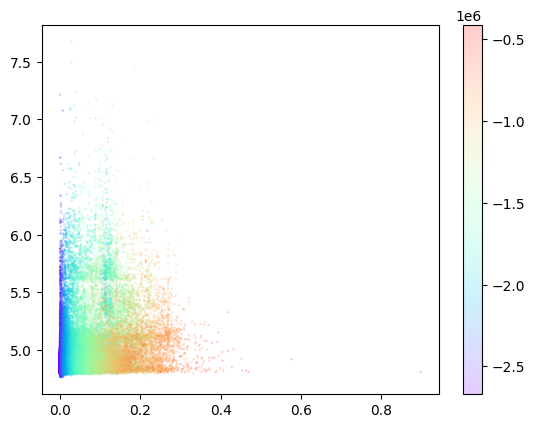

In [41]:
lum=sgi.stars.luminosities.GAMA_z
p=sgi.stars.potentials
rs=sgi.stars.spherical_coordinates.r/r
fig = plt.figure()
ax=plt.subplot(1,1,1)

sc=ax.scatter(rs,np.log10(lum),s=0.5,alpha=0.2,c=p,cmap='rainbow')
plt.colorbar(sc)